In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import numpy as np
import seaborn as sns
import random
import time 

# Summer2024-env/Scripts/activate

In [2]:
data = pd.read_csv("rt_da_monthly_lmps.csv")

In [3]:
data.head()

,datetime_beginning_utc,datetime_beginning_ept,pnode_id,pnode_name,voltage,equipment,type,zone,system_energy_price_rt,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,system_energy_price_da,total_lmp_da,congestion_price_da,marginal_loss_price_da
0,5/1/2024 3:00:00 AM,4/30/2024 11:00:00 PM,1,PJM,NaN,NaN,ZONE,NaN,18.508333,18.553337,0.032258,0.012746,21.32,21.175894,-0.118228,-0.025878
1,5/1/2024 3:00:00 AM,4/30/2024 11:00:00 PM,51205,BRANDONSH,NaN,NaN,AGGREGATE,NaN,18.508333,22.407500,3.530833,0.368333,21.32,28.990000,7.190000,0.480000
2,5/1/2024 3:00:00 AM,4/30/2024 11:00:00 PM,51206,BRUNSWICK,NaN,NaN,AGGREGATE,NaN,18.508333,16.397500,-2.069167,-0.041667,21.32,17.470000,-3.550000,-0.300000
3,5/1/2024 3:00:00 AM,4/30/2024 11:00:00 PM,51211,COOKSTOWN,NaN,NaN,AGGREGATE,NaN,18.508333,15.999167,-2.560000,0.050833,21.32,17.140000,-3.990000,-0.190000
4,5/1/2024 3:00:00 AM,4/30/2024 11:00:00 PM,51214,DOVER,NaN,NaN,AGGREGATE,NaN,18.508333,15.224167,-3.398333,0.114167,21.32,16.540000,-4.690000,-0.090000


In [4]:
data.zone.unique()

array([nan, 'EXTERNAL'], dtype=object)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233280 entries, 0 to 233279
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   datetime_beginning_utc  233280 non-null  object 
 1   datetime_beginning_ept  233280 non-null  object 
 2   pnode_id                233280 non-null  int64  
 3   pnode_name              233280 non-null  object 
 4   voltage                 0 non-null       float64
 5   equipment               0 non-null       float64
 6   type                    233280 non-null  object 
 7   zone                    5040 non-null    object 
 8   system_energy_price_rt  233280 non-null  float64
 9   total_lmp_rt            233280 non-null  float64
 10  congestion_price_rt     233280 non-null  float64
 11  marginal_loss_price_rt  233280 non-null  float64
 12  system_energy_price_da  233280 non-null  float64
 13  total_lmp_da            233280 non-null  float64
 14  congestion_price_da 

In [6]:
## Dropping null columns 
data.drop(["voltage", "equipment", "zone"], axis=1, inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233280 entries, 0 to 233279
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   datetime_beginning_utc  233280 non-null  object 
 1   datetime_beginning_ept  233280 non-null  object 
 2   pnode_id                233280 non-null  int64  
 3   pnode_name              233280 non-null  object 
 4   type                    233280 non-null  object 
 5   system_energy_price_rt  233280 non-null  float64
 6   total_lmp_rt            233280 non-null  float64
 7   congestion_price_rt     233280 non-null  float64
 8   marginal_loss_price_rt  233280 non-null  float64
 9   system_energy_price_da  233280 non-null  float64
 10  total_lmp_da            233280 non-null  float64
 11  congestion_price_da     233280 non-null  float64
 12  marginal_loss_price_da  233280 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 23.1+ MB


In [8]:
data[["pnode_id", "pnode_name"]].iloc[500:510]

,pnode_id,pnode_name
500,34497181,BUCKEYE - DPL
501,34508503,DAY
502,34509175,AMOS
503,34509177,AXTON
504,34509179,BAKER
505,34509181,BROADFORD
506,34509183,CLOVERDALE
507,34509185,COOK
508,34509187,CULLODEN
509,34509189,DUMONT


In [9]:
ask = data.index[data['pnode_name'] == "DAY"]

In [10]:
data.loc[ask]

,datetime_beginning_utc,datetime_beginning_ept,pnode_id,pnode_name,type,system_energy_price_rt,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,system_energy_price_da,total_lmp_da,congestion_price_da,marginal_loss_price_da
177,5/1/2024 3:00:00 AM,4/30/2024 11:00:00 PM,34508503,DAY,ZONE,18.508333,20.885684,1.976155,0.401196,21.32,22.748236,0.971710,0.456526
501,5/1/2024 2:00:00 AM,4/30/2024 10:00:00 PM,34508503,DAY,ZONE,19.535833,22.306357,2.404656,0.365867,25.34,27.711004,1.849750,0.521254
825,5/1/2024 1:00:00 AM,4/30/2024 9:00:00 PM,34508503,DAY,ZONE,24.825000,28.748971,3.341831,0.582141,35.02,36.642337,1.270754,0.351583
1149,5/1/2024 12:00:00 AM,4/30/2024 8:00:00 PM,34508503,DAY,ZONE,29.634167,30.427456,0.124697,0.668593,45.68,46.440142,0.454472,0.305670
1473,4/30/2024 11:00:00 PM,4/30/2024 7:00:00 PM,34508503,DAY,ZONE,30.678333,30.898930,-0.439737,0.660334,49.65,47.487696,-2.051018,-0.111286
...,...,...,...,...,...,...,...,...,...,...,...,...,...
231837,4/1/2024 8:00:00 AM,4/1/2024 4:00:00 AM,34508503,DAY,ZONE,10.737500,11.250684,0.345040,0.168144,13.36,14.487121,0.600000,0.527121
232161,4/1/2024 7:00:00 AM,4/1/2024 3:00:00 AM,34508503,DAY,ZONE,10.611667,10.677508,-0.097861,0.163702,12.58,13.559230,0.480000,0.499230
232485,4/1/2024 6:00:00 AM,4/1/2024 2:00:00 AM,34508503,DAY,ZONE,11.693333,12.692077,0.799255,0.199489,12.64,13.626131,0.460000,0.526131
232809,4/1/2024 5:00:00 AM,4/1/2024 1:00:00 AM,34508503,DAY,ZONE,11.852500,12.247794,0.233979,0.161316,12.33,13.269829,0.450000,0.489829


In [11]:
data['system_energy_price_rt'][177] + data['congestion_price_rt'][177] + data['marginal_loss_price_rt'][177]

20.885683999999998

In [12]:
# There appears to be a 100% correlation between the pnode_id and pnode_name so I will drop the pnode_name. 
data.drop(["pnode_name"], axis=1, inplace=True)

<Axes: >

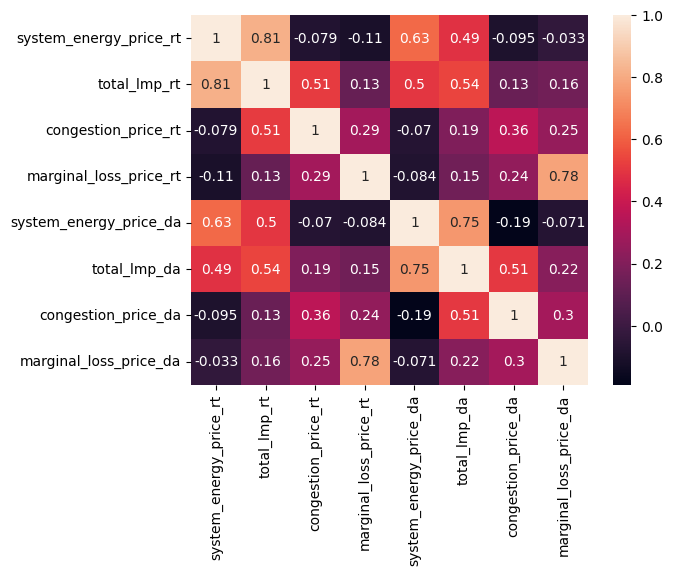

In [13]:
# Some obvious correlation between realtime and day ahead prices. 
'''
Normal Correlation:
    x realtime <-> x day ahead
Serious Correlation:
    system_energy_price_rt <-> total_lmp_rt
    congestion_price_rt <-> total_lmp_rt
'''
# Consider dropping total_lmp_rt as total_lmp_rt =  system_energy_price_rt + congestion_price_rt + marginal_loss_price_rt
sns.heatmap(data.iloc[:,4:].corr(), annot=True)

In [14]:
data.describe()

,pnode_id,system_energy_price_rt,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,system_energy_price_da,total_lmp_da,congestion_price_da,marginal_loss_price_da
count,2.332800e+05,233280.000000,233280.000000,233280.000000,233280.000000,233280.000000,233280.000000,233280.000000,233280.000000
mean,1.329401e+08,26.464234,25.854201,-0.427757,-0.182276,26.143486,25.107900,-0.892236,-0.143350
std,3.704402e+08,13.334416,15.424622,8.711020,0.827788,9.101180,10.390377,6.712248,0.923612
min,1.000000e+00,8.413333,-389.119167,-468.406667,-12.440528,9.320000,-500.000000,-532.660000,-10.147175
25%,4.345739e+06,17.179792,17.206667,-0.190833,-0.493548,19.630000,19.388116,-1.989895,-0.500000
50%,3.310856e+07,23.446250,22.580000,0.445000,-0.140833,24.150000,23.258460,0.375190,-0.100000
75%,4.113041e+07,31.895416,31.620833,2.027500,0.191667,30.572500,29.324022,1.430000,0.320000
max,2.156112e+09,139.015000,421.555000,377.211667,16.196667,71.020000,509.160000,442.190000,13.230000


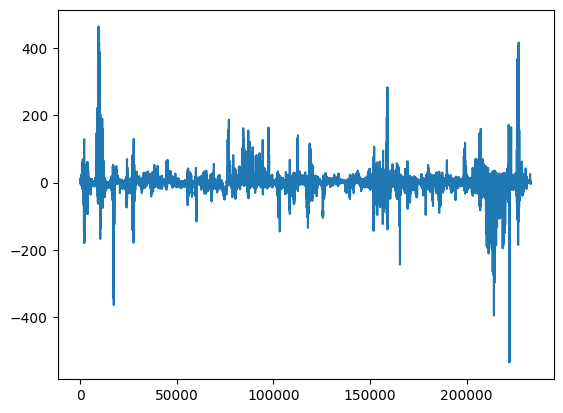

In [15]:
plt.plot(data['total_lmp_da'] - data['total_lmp_rt'])

In [16]:
## NOTES 
## git repo and west node hub

In [17]:
num = len(data['total_lmp_da'])
top_5_percent_index = num * 0.95
bottom_95_percent_index = num * 0.05

In [18]:
len(data['total_lmp_da'].loc[top_5_percent_index:])

11664

In [19]:
sorted(data['total_lmp_da'])

[-500.0,
 -500.0,
 -153.0,
 -150.0,
 -149.0,
 -149.0,
 -149.0,
 -148.0,
 -148.0,
 -147.0,
 -147.0,
 -147.0,
 -146.0,
 -145.0,
 -145.0,
 -144.0,
 -144.0,
 -142.0,
 -135.2,
 -115.59,
 -106.93,
 -69.03,
 -61.818182,
 -59.07,
 -55.205,
 -43.82,
 -41.08,
 -40.66,
 -40.041818,
 -38.175,
 -36.977793,
 -36.865,
 -36.83,
 -35.91,
 -35.86,
 -35.685,
 -35.405,
 -33.51,
 -32.375,
 -31.497793,
 -31.2,
 -30.3,
 -29.99,
 -29.868182,
 -29.8,
 -29.635,
 -29.54,
 -29.340909,
 -29.185,
 -28.855,
 -28.310909,
 -28.257793,
 -27.78,
 -27.42,
 -27.1,
 -27.095,
 -26.445,
 -25.986494,
 -25.329319,
 -23.99,
 -23.87,
 -23.826721,
 -23.53,
 -23.5,
 -23.4,
 -23.25,
 -22.965195,
 -22.8,
 -22.690845,
 -22.602371,
 -22.309546,
 -22.07,
 -21.830845,
 -21.77,
 -20.23,
 -19.99,
 -19.348247,
 -19.042371,
 -18.323896,
 -18.273896,
 -17.879091,
 -17.6,
 -17.409546,
 -17.325,
 -17.179546,
 -16.762598,
 -16.409546,
 -16.005,
 -15.74,
 -15.676721,
 -15.588247,
 -15.498247,
 -15.492371,
 -15.41,
 -15.379773,
 -15.371072,
 -15.

In [20]:
data['total_lmp_delta']  = 0
for  i in range(len(data['total_lmp_delta'])):
    data.loc[i, "total_lmp_delta"] = data.loc[i, "total_lmp_da"] - data.loc[i, "total_lmp_rt"]

C:\Users\ekkoi\AppData\Local\Temp\ipykernel_8284\2798242294.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.6225570000000005' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[i, "total_lmp_delta"] = data.loc[i, "total_lmp_da"] - data.loc[i, "total_lmp_rt"]


In [21]:
data.describe()

,pnode_id,system_energy_price_rt,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,system_energy_price_da,total_lmp_da,congestion_price_da,marginal_loss_price_da,total_lmp_delta
count,2.332800e+05,233280.000000,233280.000000,233280.000000,233280.000000,233280.000000,233280.000000,233280.000000,233280.000000,233280.000000
mean,1.329401e+08,26.464234,25.854201,-0.427757,-0.182276,26.143486,25.107900,-0.892236,-0.143350,-0.746302
std,3.704402e+08,13.334416,15.424622,8.711020,0.827788,9.101180,10.390377,6.712248,0.923612,13.172146
min,1.000000e+00,8.413333,-389.119167,-468.406667,-12.440528,9.320000,-500.000000,-532.660000,-10.147175,-535.335000
25%,4.345739e+06,17.179792,17.206667,-0.190833,-0.493548,19.630000,19.388116,-1.989895,-0.500000,-3.845521
50%,3.310856e+07,23.446250,22.580000,0.445000,-0.140833,24.150000,23.258460,0.375190,-0.100000,1.444999
75%,4.113041e+07,31.895416,31.620833,2.027500,0.191667,30.572500,29.324022,1.430000,0.320000,5.001667
max,2.156112e+09,139.015000,421.555000,377.211667,16.196667,71.020000,509.160000,442.190000,13.230000,464.642500


In [22]:
min_5 = sorted(data['total_lmp_delta'])[:int(bottom_95_percent_index)][-1]
max_5 = sorted(data['total_lmp_delta'])[int(top_5_percent_index):][0]

print("Min value:", min_5)
print("Max value:",max_5)

Min value: -21.400833
Max value: 12.07


In [23]:
data['target_c'] = 0

In [24]:
for i in range(len(data)):
    if data['total_lmp_delta'][i] <= min_5:
        data.loc[i,'target_c'] = -1
    elif data['total_lmp_delta'][i] >= max_5:
        data.loc[i,'target_c'] = 1
    else: 
        data.loc[i,'target_c'] = 0

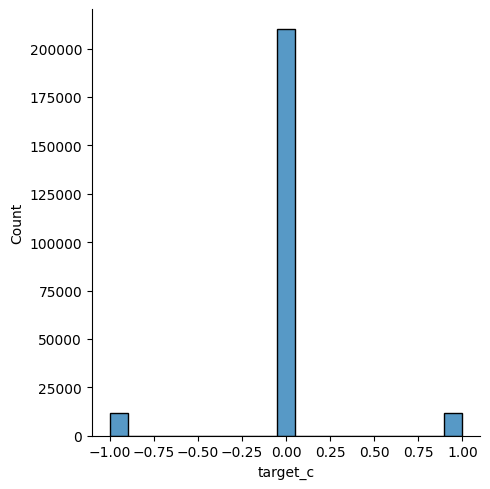

In [25]:
sns.displot(data['target_c'])

In [26]:
data['target_r'] = data['total_lmp_delta'].shift(-1)

In [40]:
data.loc[data['pnode_id'] == 51205]['type']

1         AGGREGATE
325       AGGREGATE
649       AGGREGATE
973       AGGREGATE
1297      AGGREGATE
            ...    
231661    AGGREGATE
231985    AGGREGATE
232309    AGGREGATE
232633    AGGREGATE
232957    AGGREGATE
Name: type, Length: 720, dtype: object

In [35]:
data.head()

,datetime_beginning_utc,datetime_beginning_ept,pnode_id,type,system_energy_price_rt,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,system_energy_price_da,total_lmp_da,congestion_price_da,marginal_loss_price_da,total_lmp_delta,target_c,target_r
0,5/1/2024 3:00:00 AM,4/30/2024 11:00:00 PM,1,ZONE,18.508333,18.553337,0.032258,0.012746,21.32,21.175894,-0.118228,-0.025878,2.622557,0,6.582500
1,5/1/2024 3:00:00 AM,4/30/2024 11:00:00 PM,51205,AGGREGATE,18.508333,22.407500,3.530833,0.368333,21.32,28.990000,7.190000,0.480000,6.582500,0,1.072500
2,5/1/2024 3:00:00 AM,4/30/2024 11:00:00 PM,51206,AGGREGATE,18.508333,16.397500,-2.069167,-0.041667,21.32,17.470000,-3.550000,-0.300000,1.072500,0,1.140833
3,5/1/2024 3:00:00 AM,4/30/2024 11:00:00 PM,51211,AGGREGATE,18.508333,15.999167,-2.560000,0.050833,21.32,17.140000,-3.990000,-0.190000,1.140833,0,1.315833
4,5/1/2024 3:00:00 AM,4/30/2024 11:00:00 PM,51214,AGGREGATE,18.508333,15.224167,-3.398333,0.114167,21.32,16.540000,-4.690000,-0.090000,1.315833,0,1.491445


In [64]:
print(data['type'].nunique())
print(data['pnode_id'].nunique())

6
324


In [1]:
print("l")

l


In [54]:

def uniqueMapper(data : list) -> dict:
    mapper = {}
    count = 1
    for i in data:
        if i not in mapper:
            mapper[i] = count
            count+=1
    return mapper


In [58]:
mapper = uniqueMapper(data['type'].unique())

In [62]:
data['type'] = data['type'].map(mapper)

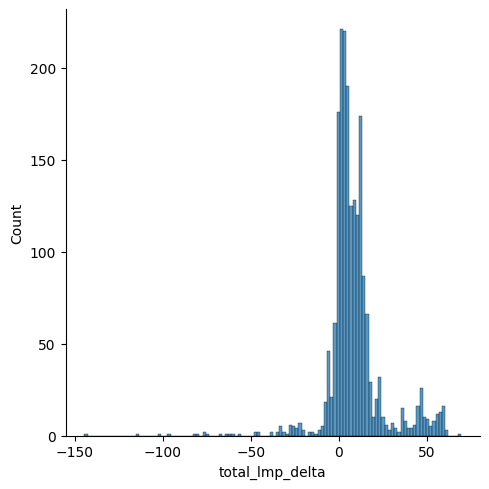

In [67]:
sns.displot(data['total_lmp_delta'][:2000])

In [72]:
from sklearn.preprocessing import StandardScaler

In [ ]:
'''
# Scale the data from -1 to 1 
# 
'''

In [73]:
scaler = StandardScaler()

In [79]:
data.iloc[:,3:-2]

,type,system_energy_price_rt,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,system_energy_price_da,total_lmp_da,congestion_price_da,marginal_loss_price_da,total_lmp_delta
0,1,18.508333,18.553337,0.032258,0.012746,21.32,21.175894,-0.118228,-0.025878,2.622557
1,2,18.508333,22.407500,3.530833,0.368333,21.32,28.990000,7.190000,0.480000,6.582500
2,2,18.508333,16.397500,-2.069167,-0.041667,21.32,17.470000,-3.550000,-0.300000,1.072500
3,2,18.508333,15.999167,-2.560000,0.050833,21.32,17.140000,-3.990000,-0.190000,1.140833
4,2,18.508333,15.224167,-3.398333,0.114167,21.32,16.540000,-4.690000,-0.090000,1.315833
...,...,...,...,...,...,...,...,...,...,...
233275,1,15.025000,15.482500,0.789167,-0.331667,13.80,14.220000,0.540000,-0.120000,-1.262500
233276,4,15.025000,15.345000,0.605000,-0.285000,13.80,14.000000,0.440000,-0.240000,-1.345000
233277,4,15.025000,15.345000,0.586667,-0.266667,13.80,13.920000,0.400000,-0.280000,-1.425000
233278,2,15.025000,10.210917,-3.907000,-0.907083,13.80,8.554500,-4.866500,-0.379000,-1.656417


In [82]:
scaler.fit(data.iloc[:,3:-2])

StandardScaler()

In [89]:
X = scaler.transform(data.iloc[:,3:-2])

In [88]:
from sklearn.model_selection import train_test_split

In [90]:
X_train, x_test, y_train, y_test = train_test_split(X,data['target_r'],test_size=0.33, shuffle=False)

In [93]:
print("X_train:",X_train.shape)
print("X_test:",x_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (156297, 10)
X_test: (76983, 10)
y_train: (156297,)
y_test: (76983,)


In [94]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression